In [2]:
#import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple, List

In [3]:
df = pd.read_csv('data/geolife-cars-upd8.csv')
print(df.describe())

                  x             y
count  1.326402e+06  1.326402e+06
mean   4.163630e+00  4.668841e+00
std    6.573106e+00  4.018217e+00
min   -8.906148e+00 -5.148530e+00
25%   -1.666201e+00  1.115242e-01
50%    5.607740e+00  5.764501e+00
75%    8.418568e+00  8.634062e+00
max    1.768826e+01  1.891964e+01


In [15]:
#List of trajectories to center
t_list = {'115-20080527225031', '115-20080528230807', 
          '115-20080618225237', '115-20080624022857', 
          '115-20080626014331', '115-20080626224815',
          '115-20080701030733', '115-20080701225507',
          '115-20080702225600', '115-20080706230401', 
          '115-20080707230001'}

#Sets of all 11 trajectories
task4_set = []
e_003_set = []
e_03_set = []
e_01_set = []

for t_id in t_list:
    trajec = df[df["id_" ] == t_id]
    t = list(zip(trajec.x, trajec.y))
    task4_set.append(t)
    e_003_set.append(TS_greedy(t, 0.03))
    e_03_set.append(TS_greedy(t, 0.3))
    e_01_set.append(TS_greedy(t, 0.1))

set_len = []
for trajec in task4_set:
    set_len.append(len(trajec))
print(set_len)


[726, 1349, 1752, 1174, 1128, 1113, 1579, 1091, 1072, 1040, 782]


In [5]:
def compute_average_trajectory(trajectories):
    interpolated_trajectories = trajectories
    num_points = len(interpolated_trajectories[0])
    avg_trajectory = []

    for i in range(num_points-1):
        total_x = 0.0
        total_y = 0.0
        for trajectory in interpolated_trajectories:
            total_x += trajectory[i][0]
            total_y += trajectory[i][1]
        avg_x = total_x / len(interpolated_trajectories)
        avg_y = total_y / len(interpolated_trajectories)
        avg_trajectory.append((avg_x, avg_y))

    return avg_trajectory

def interpolate(trajectories, num_points):
    """
    Interpolates equidistant points along each trajectory by linearly interpolating between points.

    Args:
        trajectories (list): List of trajectories, where each trajectory is a list of tuples with x and y coordinates.
        num_points (int): Number of equidistant points to interpolate.

    Returns:
        list: List of tuples containing interpolated x and y values for each trajectory.
    """
    interpolated_trajectories = []
    for trajectory in trajectories:
        x = [point[0] for point in trajectory]
        y = [point[1] for point in trajectory]
        total_distance = 0.0
        distances = [0.0]

        # Compute distances between consecutive points
        for i in range(1, len(x)):
            distance = ((x[i] - x[i - 1]) ** 2 + (y[i] - y[i - 1]) ** 2) ** 0.5
            total_distance += distance
            distances.append(total_distance)

        # Compute the spacing between equidistant points
        spacing = total_distance / (num_points - 1)

        # Interpolate y-values at equidistant points
        interpolated_y = []
        interpolated_x = []
        current_point = 0
        for i in range(num_points):
            parameter = i * spacing

            # Find the segment where the parameter falls
            while distances[current_point] < parameter:
                current_point += 1

            # Perform linear interpolation between consecutive points
            x1, y1 = x[current_point - 1], y[current_point - 1]
            x2, y2 = x[current_point], y[current_point]
            segment_length = distances[current_point] - distances[current_point - 1]
            t = (parameter - distances[current_point - 1]) / segment_length
            interpolated_x.append(x1 + (x2 - x1) * t)
            interpolated_y.append(y1 + (y2 - y1) * t)

        interpolated_trajectory = list(zip(interpolated_x, interpolated_y))
        interpolated_trajectories.append(interpolated_trajectory)

    return interpolated_trajectories

In [6]:
def approach_II(trajectories):
    total_points = 0
    for trajectory in trajectories:
        total_points += len(trajectory)
    num_points = int(total_points / len(trajectories))
    
    interpolated_trajectories = interpolate(trajectories, num_points)
    avg_trajectory = compute_average_trajectory(interpolated_trajectories)
    return avg_trajectory, num_points, interpolated_trajectories

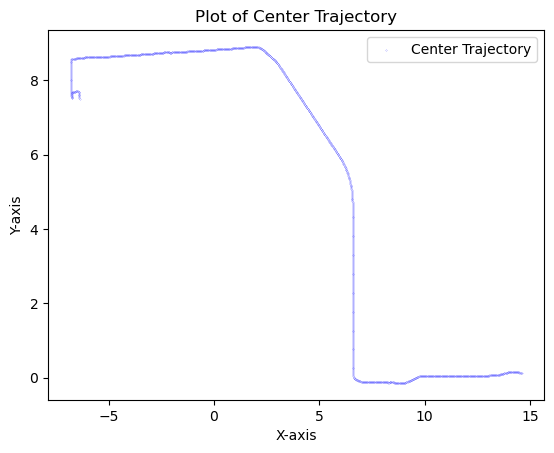

1164
726


In [21]:
#Sample Usage： plot of the first interpolated trajectory
center_traj, pt_parameter, inter_trajec = approach_II(task4_set)

points =  inter_trajec[0]

x = [point[0] for point in points]
y = [point[1] for point in points]
fig, ax = plt.subplots()
ax.scatter(x, y, c='blue', label='Center Trajectory', s = 0.01)  # Use the c parameter to specify the color, marker parameter to specify the marker shape, and linestyle parameter to specify the line style

# Set labels and title for the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Center Trajectory')
ax.legend()
plt.show()

print(len(inter_trajec[0]))
print(len(task4_set[0]))

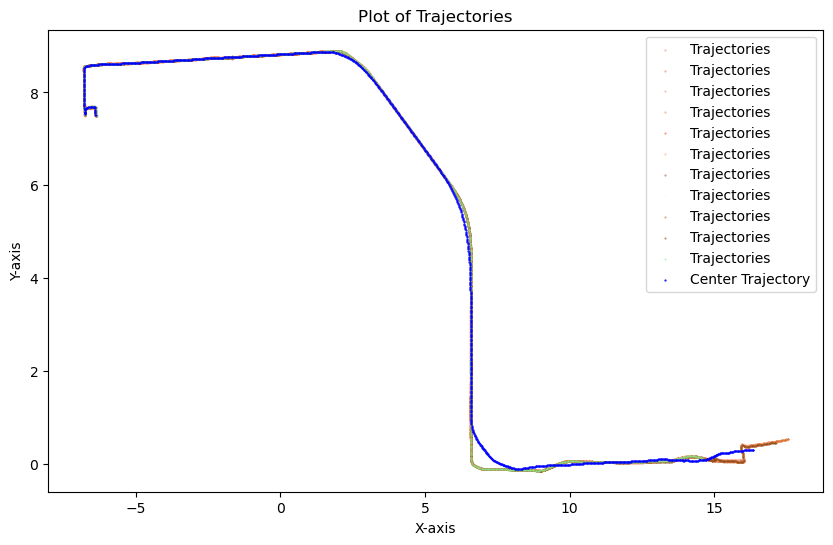

In [18]:
#Plot Center Trajectory Amongst all 11 interpolated lines 
#list of my stupid little colors
colors = ['salmon',
'tomato',
'darksalmon',
'coral',
'orangered',
'lightsalmon',
'sienna',
'seashell',
'chocolate',
'saddlebrown', 'lightgreen' ]

fig, ax = plt.subplots(figsize=(10,6))
counter = 0
for points in inter_trajec:
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax.scatter(x, y, c=colors[counter], label='Trajectories', s =0.1)  # Use the c parameter to specify the color, marker parameter to specify the marker shape, and linestyle parameter to specify the line style
    counter = counter +1

center_points = center_traj
cx = [point[0] for point in center_points]
cy = [point[1] for point in center_points]
ax.scatter(cx, cy, c='blue', label='Center Trajectory', s = 0.3) 
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Trajectories')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

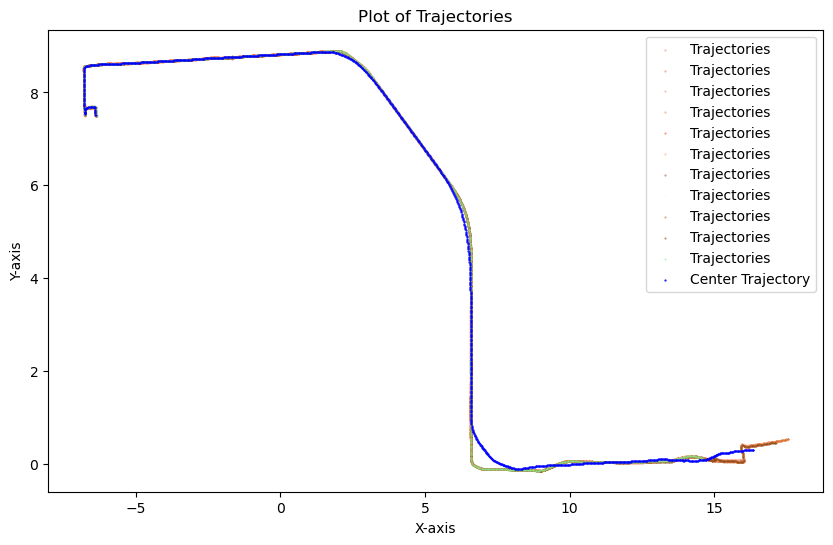

In [19]:
#Plot Center Trajectory Amongst all 11 lines in task4_set
#list of my stupid little colors
colors = ['salmon',
'tomato',
'darksalmon',
'coral',
'orangered',
'lightsalmon',
'sienna',
'seashell',
'chocolate',
'saddlebrown', 'lightgreen' ]

fig, ax = plt.subplots(figsize=(10,6))
counter = 0
for points in inter_trajec:
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    ax.scatter(x, y, c=colors[counter], label='Trajectories', s =0.1)  # Use the c parameter to specify the color, marker parameter to specify the marker shape, and linestyle parameter to specify the line style
    counter = counter +1

center_points = center_traj
cx = [point[0] for point in center_points]
cy = [point[1] for point in center_points]
ax.scatter(cx, cy, c='blue', label='Center Trajectory', s = 0.3) 
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Trajectories')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

In [14]:
#Import functions to calculate ε-simplications from Task 2

def TS_greedy(T: List[Tuple[float, float]], eps: float) -> List[Tuple[float, float]]:
    if len(T) < 3:
        return T
    else:
        T_star = [T[0], T[-1]]
        dmax = 0
        index = 0
        for i in range(1, len(T) - 1):
            dis = d(T[i], T_star)
            if dis > dmax:
                index = i 
                dmax = dis
        if dmax <= eps: 
            return T_star 
        else:
            return TS_greedy(T[0:index], eps) + TS_greedy(T[index:], eps) 
        
def d(q: Tuple[float, float], e: List[Tuple[float, float]]) -> float:
    # Let the start point of e be a, and end point be b 
    a, b = e
    dot_product = (q[0] - a[0]) * (b[0] - a[0]) + (q[1] - a[1]) * (b[1] - a[1])
    ab_length_sq = (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2
    projection = dot_product / ab_length_sq
    if projection <= 0:
        return ((q[0] - a[0]) ** 2 + (q[1] - a[1]) ** 2) ** 0.5
    elif projection >= 1:
        return ((q[0] - b[0]) ** 2 + (q[1] - b[1]) ** 2) ** 0.5
    else:
        closest_x = a[0] + projection * (b[0] - a[0])
        closest_y = a[1] + projection * (b[1] - a[1])
        return ((q[0] - closest_x) ** 2 + (q[1] - closest_y) ** 2) ** 0.5